<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2020/blob/master/day-04/MLDM_2020_seminar04_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

# Task 1 (3 points + 2 bonus points for a well organized and easy to read plot + 1 bonus point for the short comment)

Consider the following toy dataset with pairs of correlated features:

In [2]:
def gen_data(N, correlation=0.5):
    # start from 4 independent features:
    X = np.random.uniform(-1., 1., size=(N, 4))

    y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

    # add correlations, so that X[:,0] correlates with X[:,2] and
    # X[:,1] correlates with X[:,3]:
    X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

    # add some noise to the targets
    y += np.random.normal(size=y.shape)

    return X, y

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

In [3]:
from tqdm import tqdm

for correlation in [0.1, 0.5, 0.9]:
    # dataset to fit (no need to split into train/test in this task):
    X, y = gen_data(500, correlation)

    # regularization powers:
    alpha_values = np.logspace(-4, 4, 100, base=10)

    # lists to collect models' parameters:
    params_ridge = []
    params_lasso = []

    for alpha in tqdm(alpha_values):
        ridge = Ridge(alpha=alpha)
        ridge.fit(X, y)
        params_ridge.append(ridge.coef_)
        
        lasso = Lasso(alpha=alpha)
        lasso.fit(X, y)
        params_lasso.append(lasso.coef_)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 109.53it/s]


In [4]:
def weight_versus_alpha_plot(weight, alphas, features, regularizer_name):
    """
    Pass in the estimated weight, the alpha value and the names
    for the features and plot the model's estimated coefficient weight 
    for different alpha values
    """
    fig = plt.figure(figsize = (8, 6))
    
    # ensure that the weight is an array
    weight = np.array(weight)
    for col in range(weight.shape[1]):
        plt.plot(np.log(alphas), weight[:, col], label = features[col])

    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
    
    # manually specify the coordinate of the legend
    plt.legend(bbox_to_anchor = (1.3, 0.9))
    plt.title(f'Coefficient Weight as Alpha Grows --{regularizer_name}')
    plt.ylabel('Coefficient weight')
    plt.xlabel('alpha')
    return fig

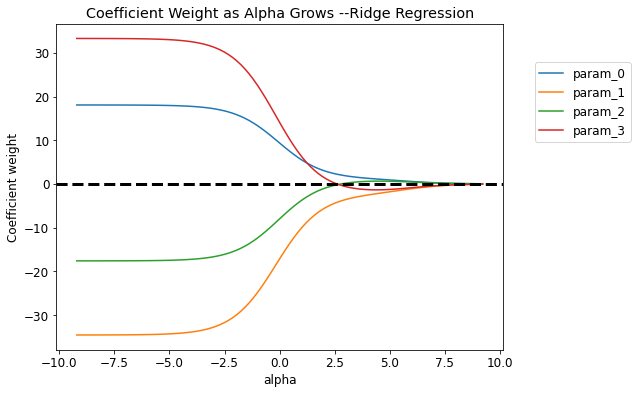

In [5]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 16, 12
plt.rcParams['font.size'] = 12

ridge_fig = weight_versus_alpha_plot(params_ridge, alpha_values, ['param_0', 'param_1', 'param_2', 'param_3'], 'Ridge Regression')

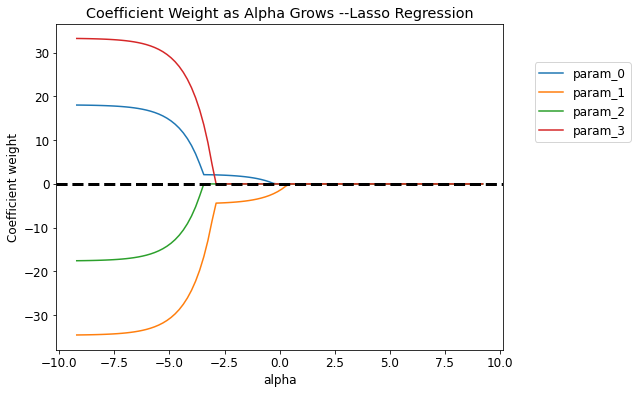

In [6]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 16, 12
plt.rcParams['font.size'] = 12
lasso_fig = weight_versus_alpha_plot(params_lasso, alpha_values, ['param_0', 'param_1', 'param_2', 'param_3'], 'Lasso Regression')

From the two graphs presented above, we can see that as the penalty value, alpha increases:

Lasso regression shrinks coefficients to zero, thus removing them from the model.
Ridge regression however shrinks coefficients almost to zero, but they rarely reach zero or go beyond zero